# **Basic ML**

In [ ]:
import tensorflow as tf

# Cek ketersediaan GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!nvcc --version  # Cek versi CUDA
!cat /usr/include/cudnn_version.h | grep CUDNN_MAJOR -A 2  # Cek versi cuDNN

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
#define CUDNN_MAJOR 8
#define CUDNN_MINOR 9
#define CUDNN_PATCHLEVEL 6
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

/* cannot use constexpr here since this is a C-only file */


In [ ]:
import tensorflow as tf

# Membuat model dan melatihnya di GPU
with tf.device('/GPU:0'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import torch

# Cek apakah GPU tersedia
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Menggunakan GPU jika tersedia
x = torch.tensor([1.0, 2.0, 3.0], device=device)
print(x)


tensor([1., 2., 3.], device='cuda:0')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install gdown

import gdown

# Unduh file test
test_file_id = '1ToSM8I6qwZ2Oa7BNe7vP9arWdI-uWH25'
test_file_url = f'https://drive.google.com/uc?id={test_file_id}'
gdown.download(test_file_url, 'test.csv', quiet=False)

# Unduh file train
train_file_id = '1w9-_wDR5bkitCGc7Q2gHvVIsxO1lFaD6'
train_file_url = f'https://drive.google.com/uc?id={train_file_id}'
gdown.download(train_file_url, 'train.csv', quiet=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From (original): https://drive.google.com/uc?id=1ToSM8I6qwZ2Oa7BNe7vP9arWdI-uWH25
From (redirected): https://drive.google.com/uc?id=1ToSM8I6qwZ2Oa7BNe7vP9arWdI-uWH25&confirm=t&uuid=fd3823c9-e6c2-4496-a194-e395469c43aa
To: /content/test.csv
100%|██████████| 434M/434M [00:05<00:00, 81.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1w9-_wDR5bkitCGc7Q2gHvVIsxO1lFaD6
From (redirected): https://drive.google.com/uc?id=1w9-_wDR5bkitCGc7Q2gHvVIsxO1lFaD6&confirm=t&uuid=3d463f43-4235-4561-86f6-288cfb1112e7
To: /content/train.csv
100%|██████████| 663M/663M [00:06<00:00, 99.3MB/s]


'train.csv'

In [ ]:
import pandas as pd

# Membaca file CSV ke dalam DataFrame
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Menampilkan beberapa baris dari DataFrame
print("Test DataFrame:")
print(test.head())

print("\nTrain DataFrame:")
print(train.head())

Test DataFrame:
         id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  11504798  Female   20                1         47.0                   0   
1  11504799    Male   47                1         28.0                   0   
2  11504800    Male   47                1         43.0                   0   
3  11504801  Female   22                1         47.0                   1   
4  11504802    Male   51                1         19.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No          2630.0                 160.0      228  
1    1-2 Year            Yes         37483.0                 124.0      123  
2    1-2 Year            Yes          2630.0                  26.0      271  
3    < 1 Year             No         24502.0                 152.0      115  
4    1-2 Year             No         34115.0                 124.0      148  

Train DataFrame:
   id  Gender  Age  Driving_L

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'

## **Import Dataset**

## **Explore Dataset**

In [ ]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
5,5,Female,31,1,47.0,1,< 1 Year,No,28150.0,152.0,197,0
6,6,Male,23,1,45.0,1,< 1 Year,No,27128.0,152.0,190,0
7,7,Female,47,1,8.0,0,1-2 Year,Yes,40659.0,26.0,262,1
8,8,Female,26,1,28.0,1,< 1 Year,No,31639.0,152.0,36,0
9,9,Female,66,1,11.0,0,1-2 Year,Yes,2630.0,26.0,125,0


In [ ]:
train.shape;

In [ ]:
train_df_sample = train.sample(100)

In [ ]:
train_df_sample

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
9070914,9070914,Male,23,1,28.0,0,< 1 Year,Yes,2630.0,156.0,206,1
7910338,7910338,Male,37,1,8.0,0,1-2 Year,Yes,36830.0,124.0,93,0
9154881,9154881,Female,24,1,14.0,1,< 1 Year,No,22998.0,152.0,189,0
8415045,8415045,Male,47,1,45.0,0,1-2 Year,Yes,38610.0,124.0,113,0
9375515,9375515,Female,23,1,13.0,1,< 1 Year,No,21716.0,26.0,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5916688,5916688,Male,57,1,50.0,0,1-2 Year,Yes,32535.0,124.0,128,0
5291174,5291174,Male,21,1,2.0,1,< 1 Year,No,30960.0,160.0,94,0
5497597,5497597,Female,37,1,28.0,1,1-2 Year,No,34146.0,124.0,78,0
4549962,4549962,Female,22,1,28.0,1,< 1 Year,No,32434.0,160.0,56,0


In [ ]:
round(train_df_sample.describe().T,2);

In [ ]:
train_df_sample.info( );

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 9070914 to 7566396
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   Gender                100 non-null    object 
 2   Age                   100 non-null    int64  
 3   Driving_License       100 non-null    int64  
 4   Region_Code           100 non-null    float64
 5   Previously_Insured    100 non-null    int64  
 6   Vehicle_Age           100 non-null    object 
 7   Vehicle_Damage        100 non-null    object 
 8   Annual_Premium        100 non-null    float64
 9   Policy_Sales_Channel  100 non-null    float64
 10  Vintage               100 non-null    int64  
 11  Response              100 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 10.2+ KB


In [ ]:
test.shape

(7669866, 11)

In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


<ipython-input-18-41af24f5fa69>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col], palette='coolwarm')


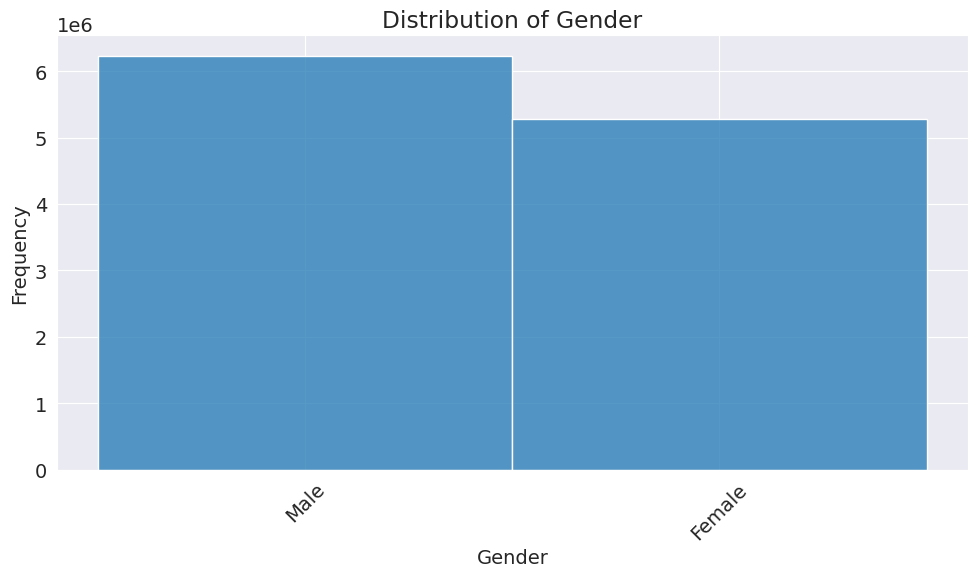

<ipython-input-18-41af24f5fa69>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col], palette='coolwarm')


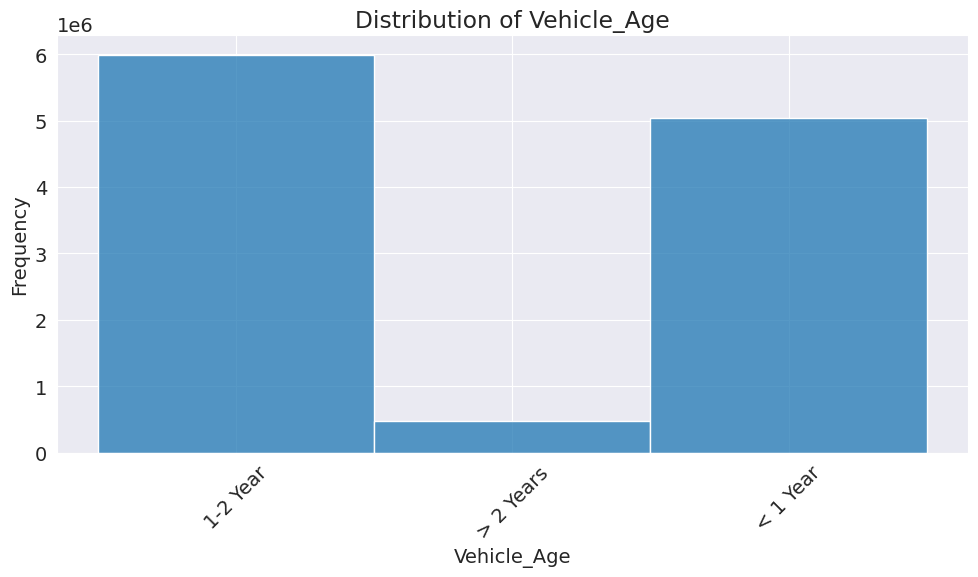

<ipython-input-18-41af24f5fa69>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col], palette='coolwarm')


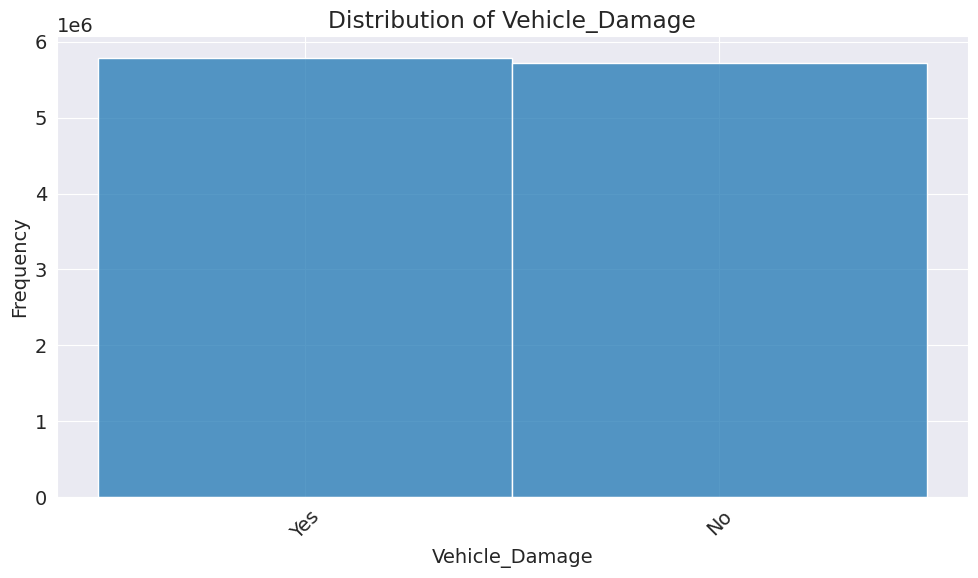

In [ ]:
for col in train.select_dtypes(include='object').columns:
    sns.histplot(train[col], palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

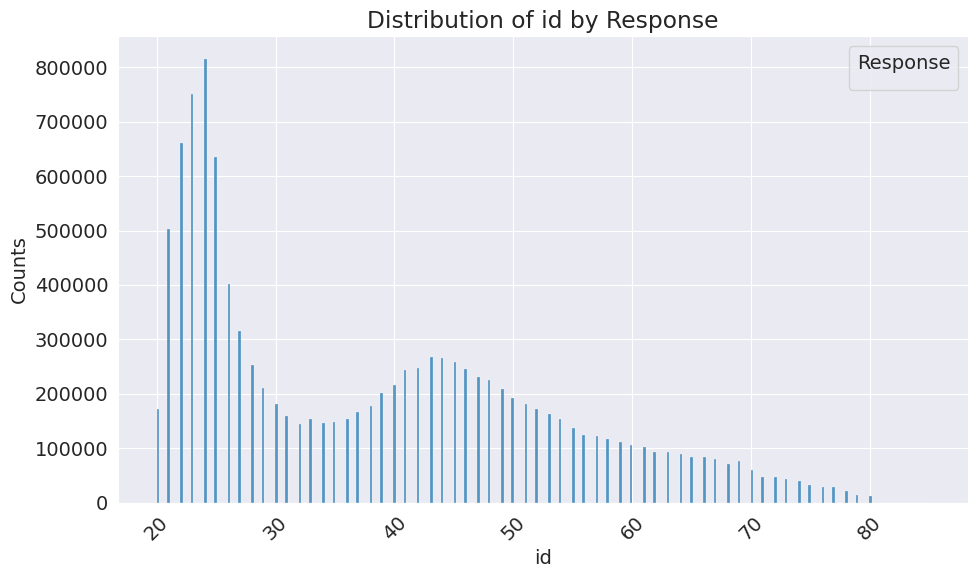

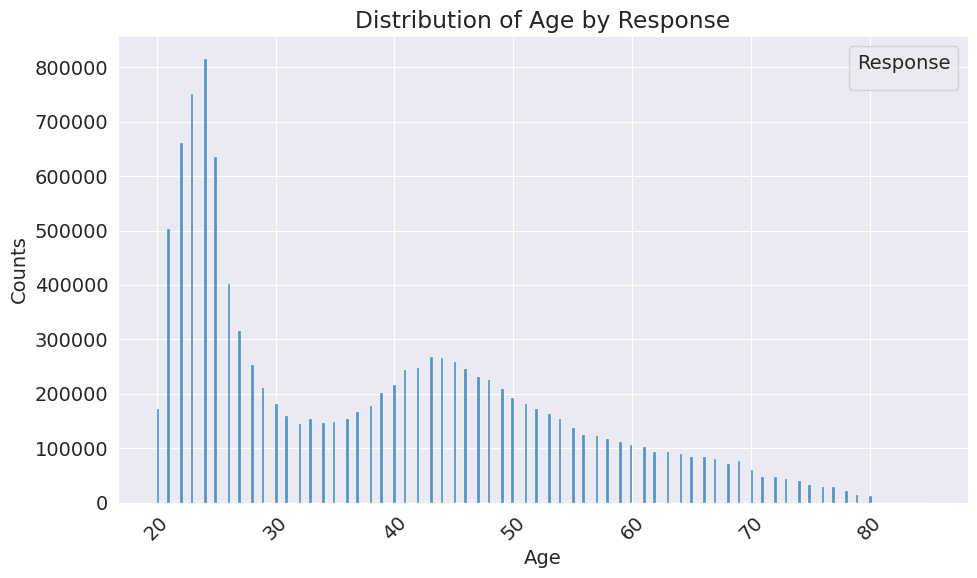

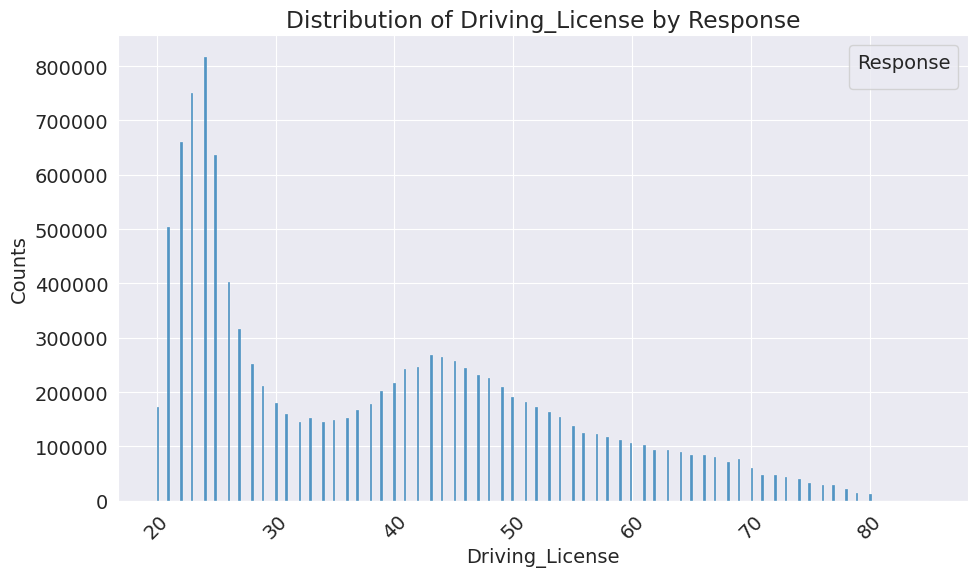

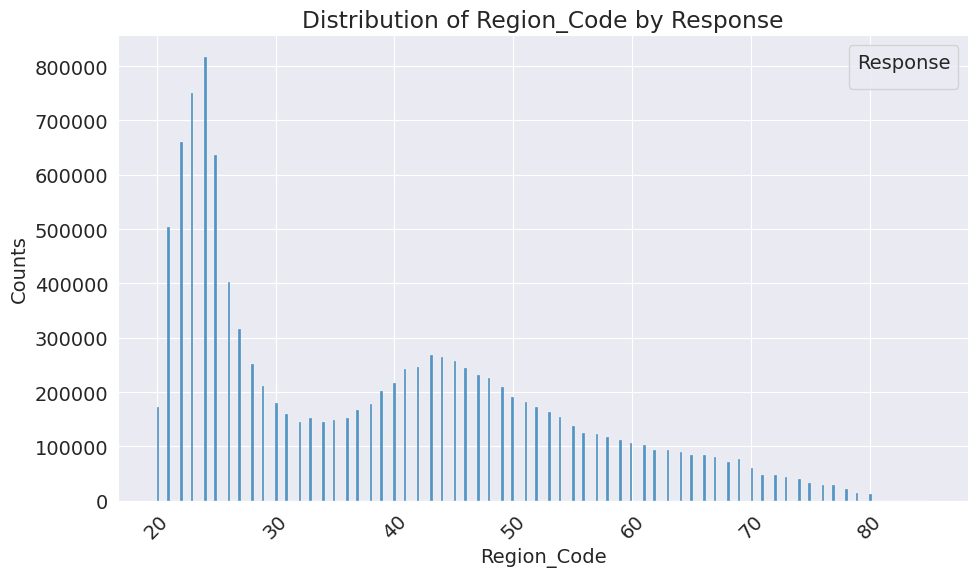

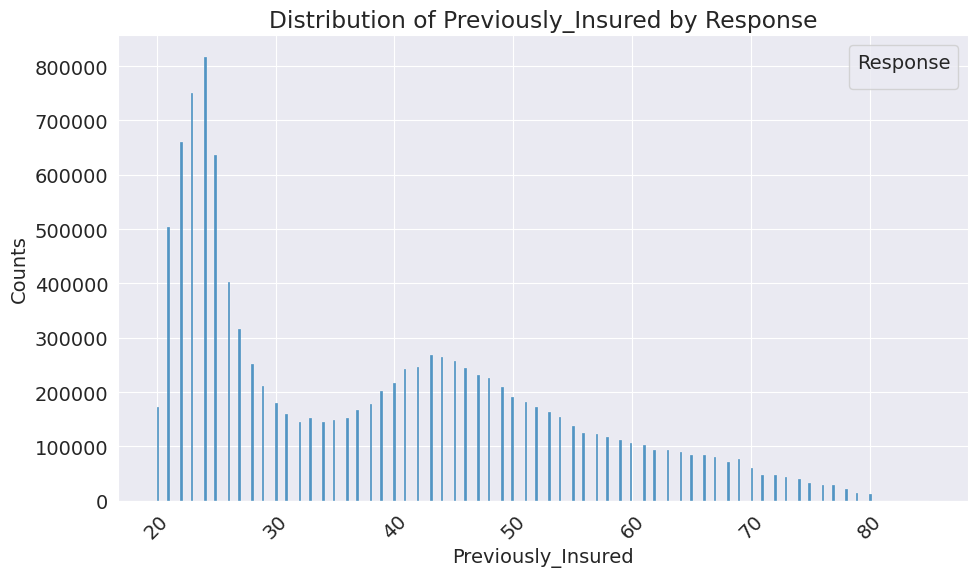

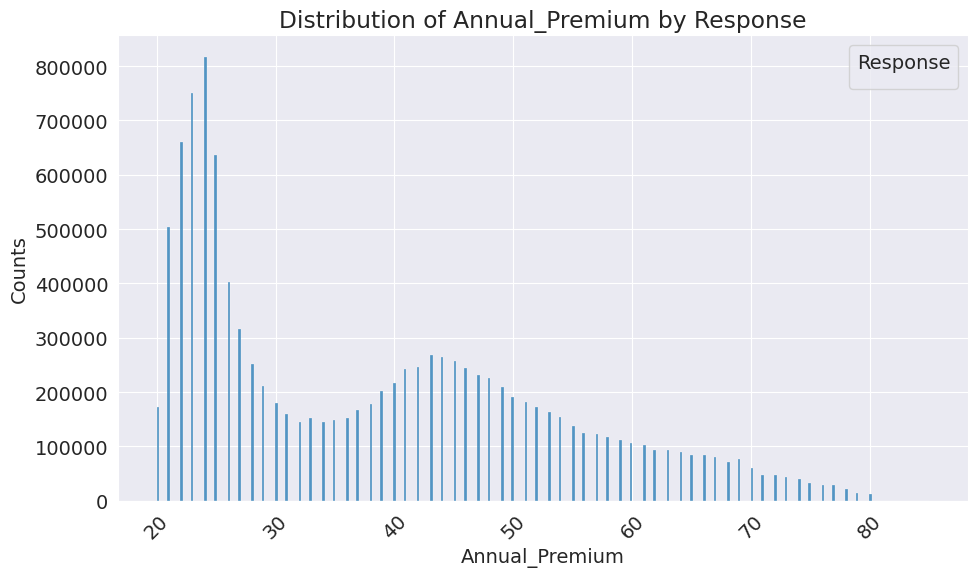

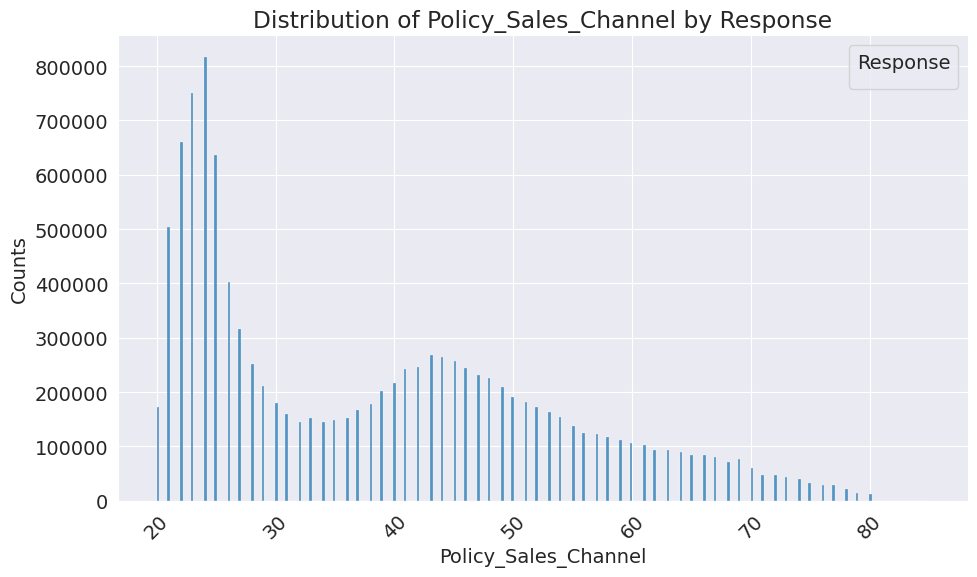

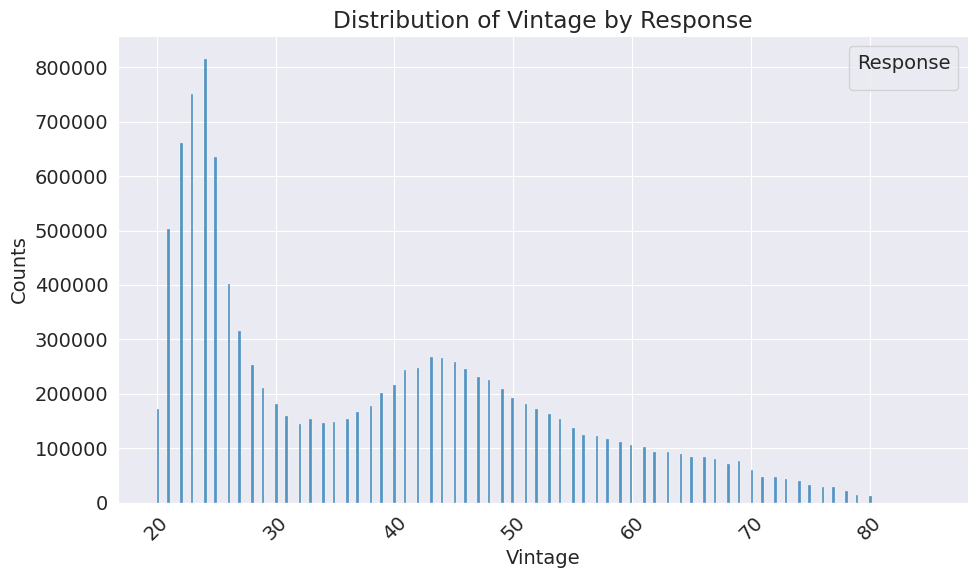

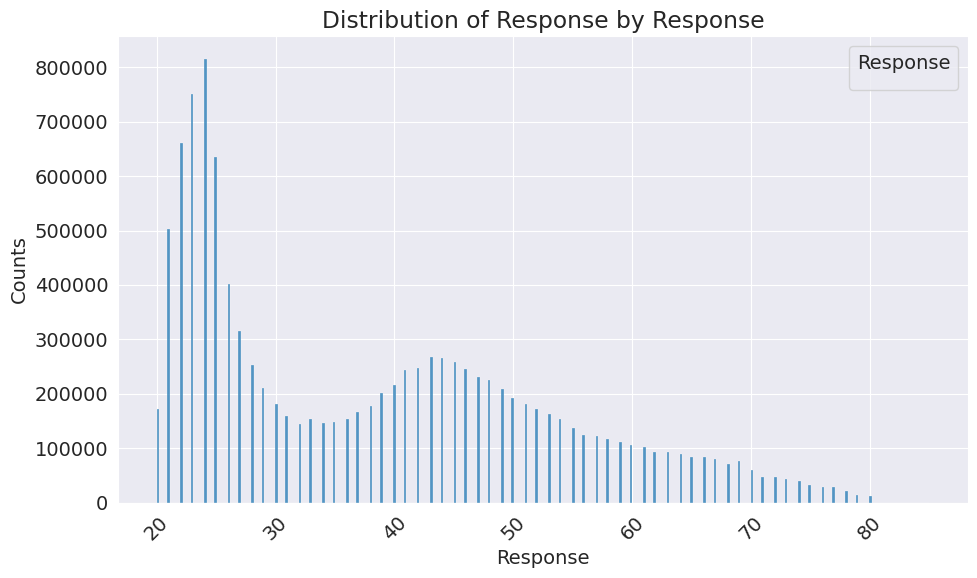

In [ ]:
for col in train.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train,x='Age')
    plt.title(f'Distribution of {col} by Response')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.legend(title='Response')
    plt.xticks(rotation=45)
    plt.tight_layout();
    plt.show()

## **Explonatory Data Analysis**

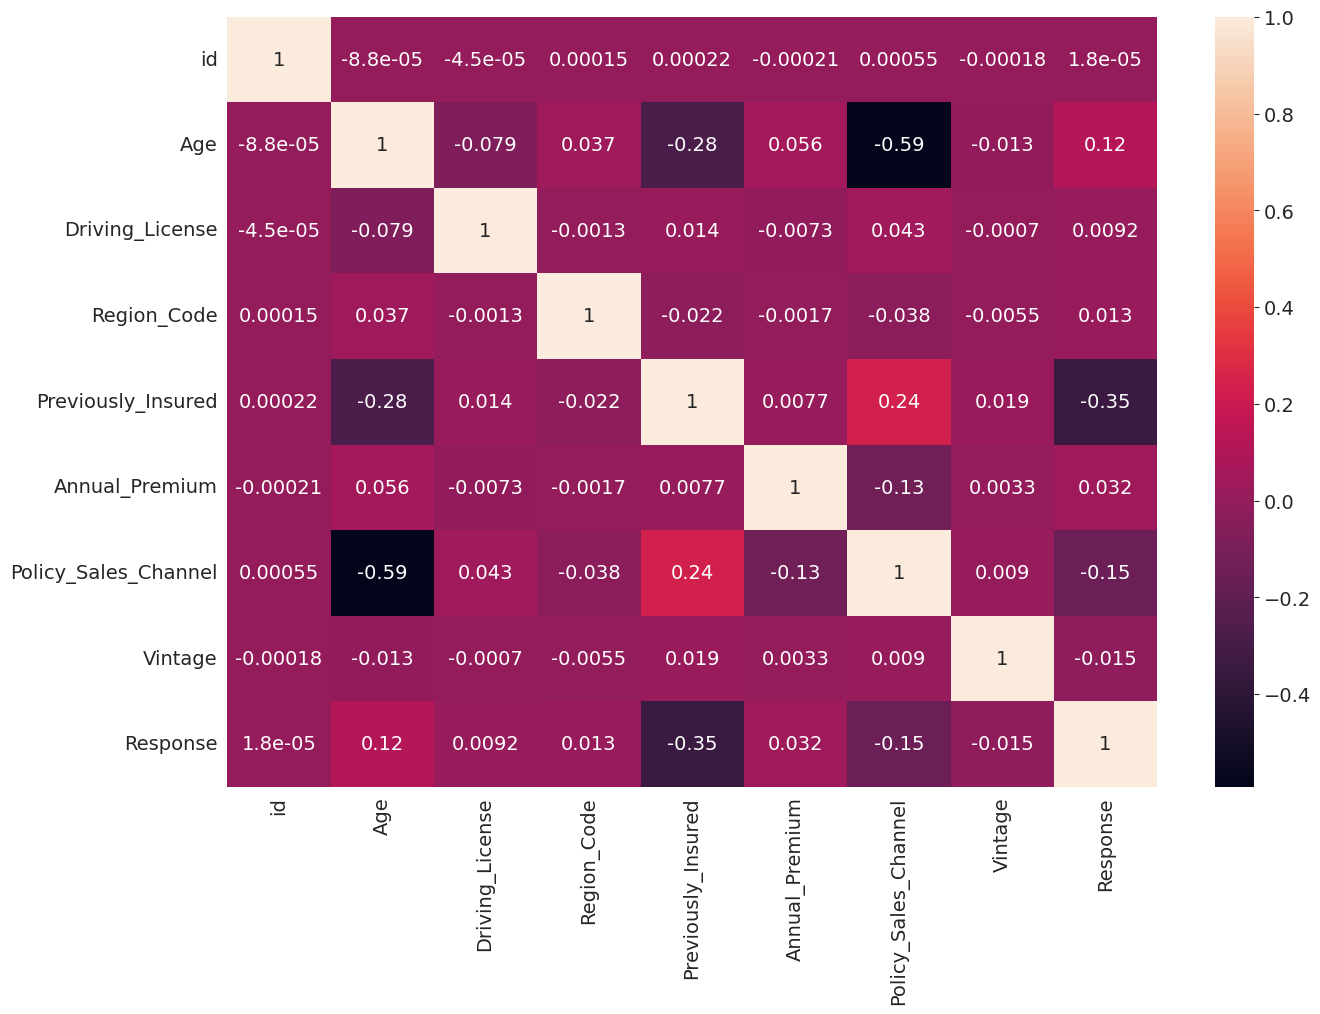

In [ ]:
correleation_matrix=train.corr(numeric_only=True);
plt.figure(figsize=(15,10));
sns.heatmap(correleation_matrix,annot=True);

## **Remove Null Values**

In [ ]:
train.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
test.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


## **Feature Engneering**

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
# Define bins and labels for age classification
bins = [18, 35, 60, 100]
labels = ['Young Adult', 'Adult', 'Senior']

# Age classification
train['Age Group'] = pd.cut(train['Age'], bins=bins, labels=labels, ordered=False)
test['Age Group'] = pd.cut(test['Age'], bins=bins, labels=labels, ordered=False)

# Convert age groups to numeric values
age_group_mapping = {'Young Adult': 1, 'Adult': 2, 'Senior': 3}
train['Age Group'] = train['Age Group'].map(age_group_mapping)
test['Age Group'] = test['Age Group'].map(age_group_mapping)

# 'Age Group Numeric' is numeric in both datasets
train['Age Group'] = pd.to_numeric(train['Age Group'], errors='coerce')
test['Age Group '] = pd.to_numeric(test['Age Group'], errors='coerce')

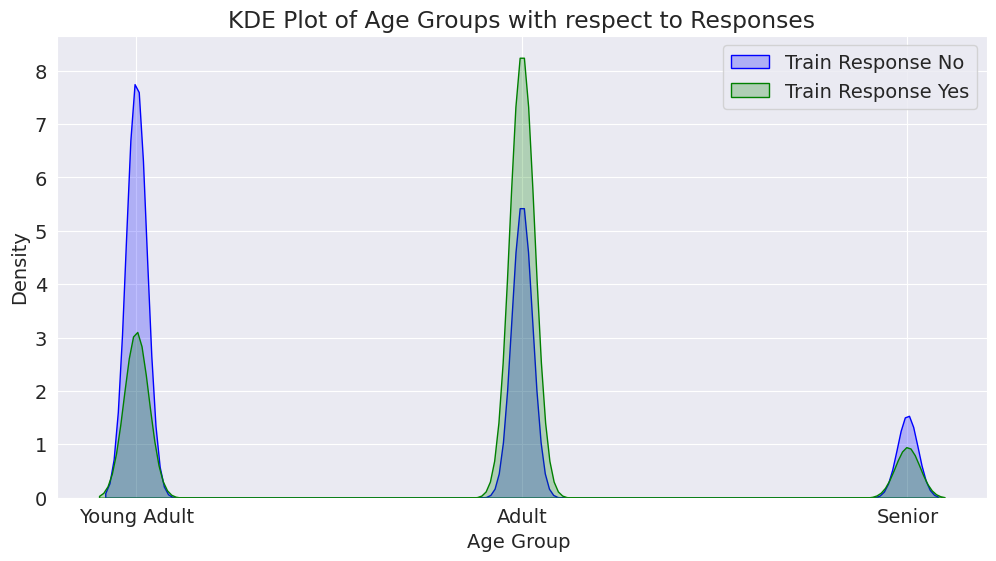

In [ ]:
# Plotting the KDE for numeric 'Age Group' for Response=0
plt.figure(figsize=(12, 6))
sns.kdeplot(data=train[train.Response == 0], x='Age Group', fill=True, label='Train Response No', color='blue')
sns.kdeplot(data=train[train.Response == 1], x='Age Group', fill=True, label='Train Response Yes', color='green')

# Adding labels and title
plt.title('KDE Plot of Age Groups with respect to Responses')
plt.xlabel('Age Group ')
plt.ylabel('Density')
plt.xticks(ticks=[1, 2, 3], labels=['Young Adult', 'Adult', 'Senior'])
plt.legend()
plt.show()

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age Group'],
      dtype='object')

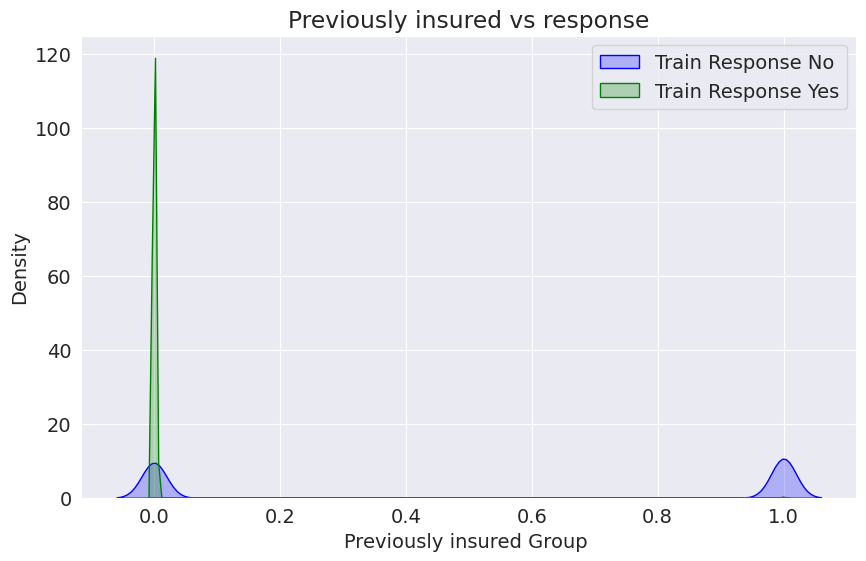

In [ ]:
# Plot KDE for 'Age Group Numeric' in the train dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train[train.Response == 0], x='Previously_Insured', fill=True, label='Train Response No', color='blue')
sns.kdeplot(data=train[train.Response == 1], x='Previously_Insured', fill=True, label='Train Response Yes', color='green')

# Adding labels and title
plt.title('Previously insured vs response')
plt.xlabel('Previously insured Group ')
plt.ylabel('Density')
#plt.xticks(ticks=[1, 2, 3], labels=['Young Adult', 'Adult', 'Senior'])
plt.legend()
plt.show()

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age Group'],
      dtype='object')

In [ ]:
train['Response'] = train['Response'].astype('int32')

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [ ]:
X=train.drop('Response',axis=1)
y=train['Response']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=train.select_dtypes(include=['int64','float64']).columns

scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale]=scaler.fit_transform(X_test[cols_to_scale])
test[cols_to_scale]=scaler.transform(test[cols_to_scale])
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Age Group,Age Group
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,1.333334e+00,2.829441e-01,9.980208e-01,5.082041e-01,4.630772e-01,5.178365e-02,6.874382e-01,5.325245e-01,3.048300e-01,1.609660e+00
std,1.924502e-01,2.307616e-01,4.444387e-02,2.498909e-01,4.986349e-01,3.059497e-02,3.337876e-01,2.767628e-01,3.314953e-01,6.629907e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.166667e+00,6.153846e-02,1.000000e+00,2.884615e-01,0.000000e+00,4.213679e-02,1.728395e-01,3.079585e-01,0.000000e+00,1.000000e+00
50%,1.333334e+00,2.461538e-01,1.000000e+00,5.384615e-01,0.000000e+00,5.431646e-02,9.259259e-01,5.397924e-01,5.000000e-01,2.000000e+00
75%,1.500000e+00,4.461538e-01,1.000000e+00,6.730769e-01,1.000000e+00,6.851647e-02,9.320988e-01,7.681661e-01,5.000000e-01,2.000000e+00
max,1.666667e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [ ]:
X_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age Group
2405201,0.209061,Female,0.323077,1.0,0.634615,0.0,1-2 Year,Yes,0.067294,0.759259,0.525952,0.5
7069408,0.614475,Male,0.061538,1.0,0.942308,0.0,< 1 Year,Yes,0.000000,0.932099,0.941176,0.0
1044712,0.090807,Male,0.292308,1.0,0.211538,0.0,1-2 Year,Yes,0.053282,0.759259,0.757785,0.5
6286832,0.546453,Male,0.492308,1.0,0.153846,1.0,1-2 Year,No,0.059092,0.154321,0.411765,0.5
5807645,0.504802,Female,0.753846,1.0,0.788462,1.0,1-2 Year,No,0.052004,0.759259,0.356401,1.0


In [ ]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age Group
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01,1.609228e+00
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01,6.628253e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00,1.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00,2.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00,2.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00,3.000000e+00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [ ]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,id,3.978001
1,Age,21.415557
2,Driving_License,28.681032
3,Region_Code,5.105556
4,Previously_Insured,2.042389
5,Annual_Premium,3.899887
6,Policy_Sales_Channel,8.104893
7,Vintage,4.672365
8,Age Group,15.520433


In [ ]:
features_to_drop_VIF=['Age','id','Vintage','Driving_License']

In [ ]:
X_train_1=X_train[cols_to_scale].drop(features_to_drop_VIF,axis=1)

In [ ]:
vif_df=calculate_vif(X_train_1)
vif_df

In [ ]:
selected_numeric_feature_vif=vif_df.Column.values
selected_numeric_feature_vif

In [ ]:
numeric_columns=X_train.select_dtypes(include=['float64','int64']).columns

In [ ]:
plt.figure(figsize=(12, 12))
cm = pd.concat([X_train[selected_numeric_feature_vif], y_train], axis=1).corr()
sns.heatmap(cm, annot=True, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
X_train.info()

In [ ]:
columns_categorical = X_train.select_dtypes(include='object').columns
columns_categorical

In [ ]:
temp=pd.concat([X_train,y_train],axis=1)

In [ ]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

In [ ]:
grouped,total_iv=calculate_woe_iv(pd.concat([X_train,y_train],axis=1),'Vehicle_Damage','Response')
grouped

In [ ]:
iv_values={}

for feature in X_train.columns:
    if X_train[feature].dtype=='object':
        _,iv=calculate_woe_iv(pd.concat([X_train,y_train],axis=1),feature,'Response')
    else:
        X_binned=pd.cut(X_train[feature],bins=10,labels=False)
        _,iv =calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,'Response')
    iv_values[feature] = iv
iv_values

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
iv_df = pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df=iv_df.sort_values(by='IV',ascending =False)
iv_df

In [ ]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

## **Feature Encoding**

In [ ]:
X_train_reduced=X_train[selected_features_iv]
X_test_reduced=X_test[selected_features_iv]
test_reduced=test[selected_features_iv]
X_train.head()

In [ ]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)
test_encoded=pd.get_dummies(test_reduced,drop_first=True)
X_train_encoded.head()

## **Model Training**

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model=LogisticRegression()
model.fit(X_train_encoded.head(10000),y_train.head(10000))

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train_encoded.head(10000),y_train.head(10000))

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

In [ ]:
mdeo=XGBClassifier()
model.fit(X_train_encoded.head(10000),y_train.head(10000))

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

## **Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply the under-sampling technique on the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)

# Display the value counts of the resampled target variable to see the new distribution
print(y_train_rus.value_counts())

In [ ]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

In [ ]:
mdeo=XGBClassifier()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

## **Over Sampling**

In [ ]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

smt=SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

In [ ]:
model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)

In [ ]:
mdeo=XGBClassifier()
model.fit(X_train_smt,y_train_smt)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_pred,y_test)
print(report)